Na ćwiczeniach wykonasz dekompozycję szeregu czasowego przy założeniu jego addytywności metodą klasyczną

In [69]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import itables
from itables import show
from itables import init_notebook_mode
import copy

1. Wgraj zbiór danych CO2 

In [70]:
df = pd.read_csv('CO2 dataset.csv')
df

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06
...,...,...,...,...,...,...,...
715,2017,8,2017.6219,NaN,NaN,NaN,NaN
716,2017,9,2017.7068,NaN,NaN,NaN,NaN
717,2017,10,2017.7890,NaN,NaN,NaN,NaN
718,2017,11,2017.8740,NaN,NaN,NaN,NaN



2. Stwórz wykres pamiętając o podpisaniu osi

Text(0.5, 1.0, ' Stężenie CO2 na przestrzeni lat')

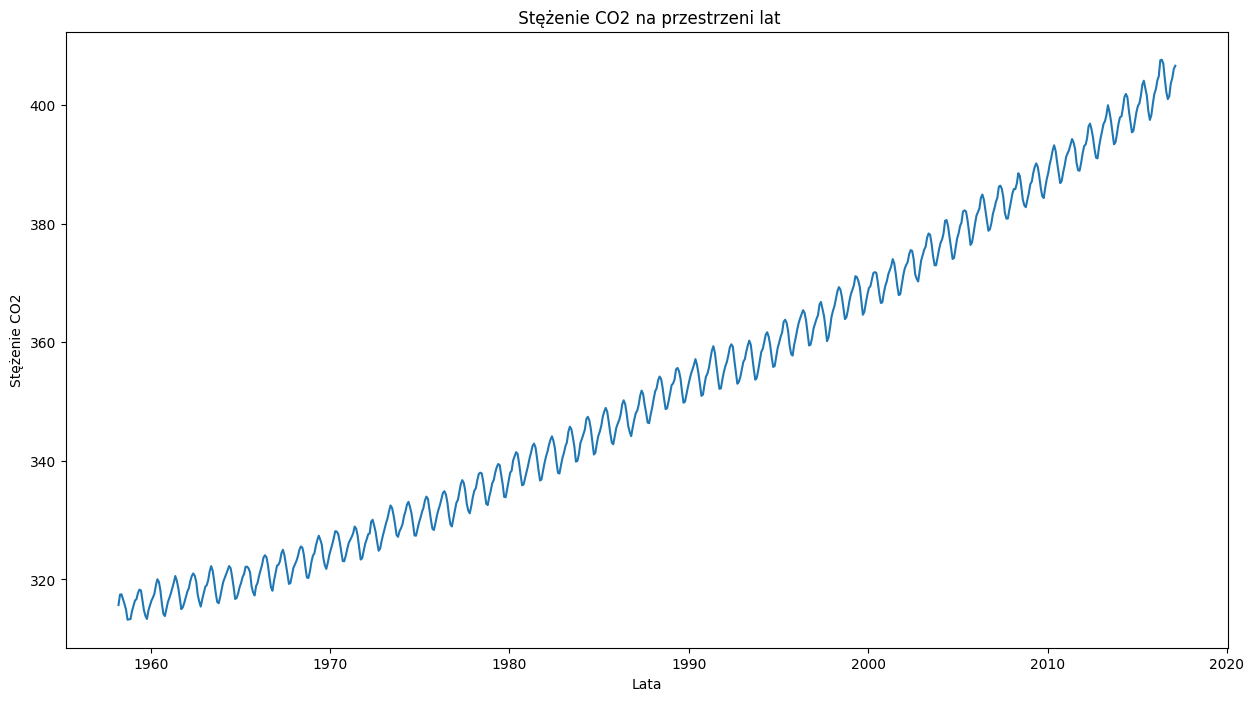

In [71]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.lineplot(x=df['Decimal Date'],y=df['Carbon Dioxide (ppm)'])
ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title(" Stężenie CO2 na przestrzeni lat")

3. Określ sezonowość i wylicz krzywą trendu. Przykładowo dla danych o częstotliwości miesięcznej oraz rocznej sezonowości zjawiska potrzebne będzie stworzenie okna w rozmiarze 12.
Jeśli okresowość naszego zjawiska jest liczbą nieparzystą to średnią kroczącą do wyliczenia trendu możemy obliczyć dla okna 1xT, natomiast gdy jest liczbą parzystą używamy okna 2xT.
Wykonujemy ten krok by pozbyć się fluktuacji sezonowych. 

Przykład dla danych o częstotliwości miesięcznej, sezonowści rocznej (12 obserwacji = miesięcy)

In [72]:
rozmiar_okna = 12
df['trend'] = df.rolling(window=rozmiar_okna).mean()['Carbon Dioxide (ppm)']
show(df)


4. Wykonaj wizualizację sygnału wejściowego oraz trendu na jednym wykresie

Text(0.5, 1.0, ' Stężenie CO2 na przestrzeni lat')

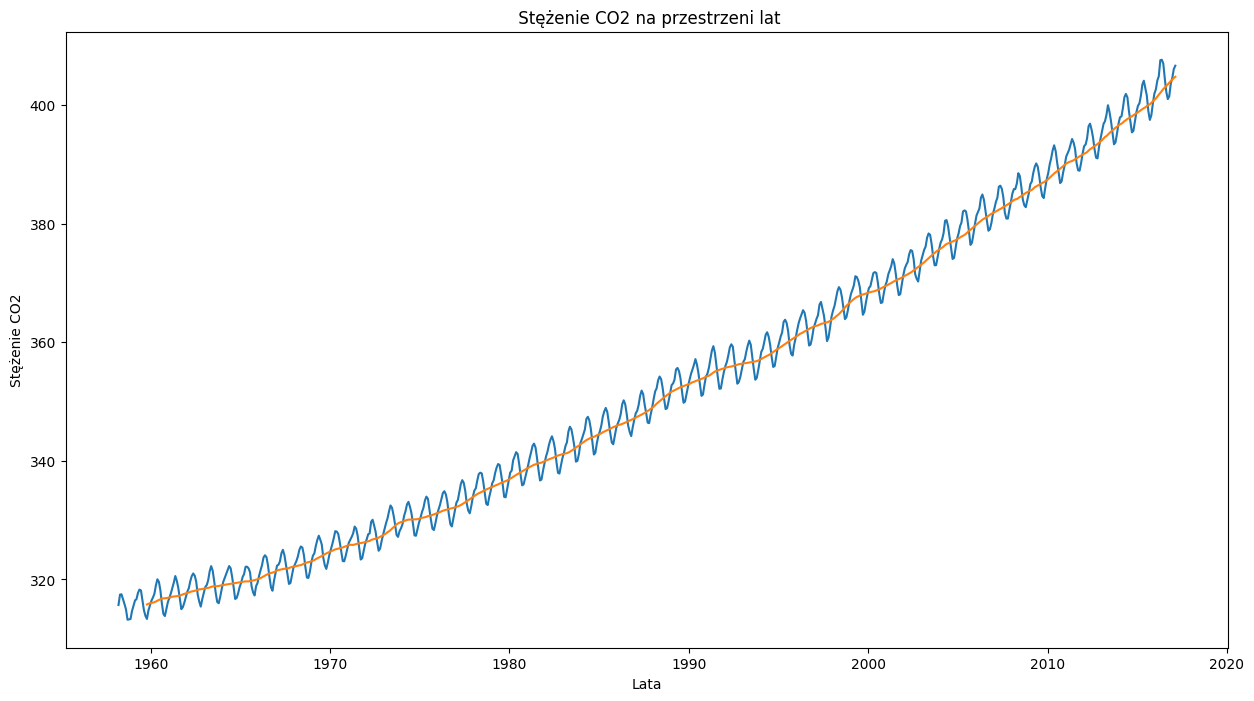

In [73]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.lineplot(x=df['Decimal Date'],y=df['Carbon Dioxide (ppm)'])
sns.lineplot(x=df['Decimal Date'],y=df['trend'])
ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title(" Stężenie CO2 na przestrzeni lat")

5. Odejmij od sygnału wejściowego wyliczony trend i wykonaj na jednym wykresie wykres wszystkich trzech składowych w celu sprawdzenia. Skomentuj KRÓTKO wynik

Input_detrended
Loading... (need help?)


Text(0.5, 1.0, ' Stężenie CO2 na przestrzeni lat')

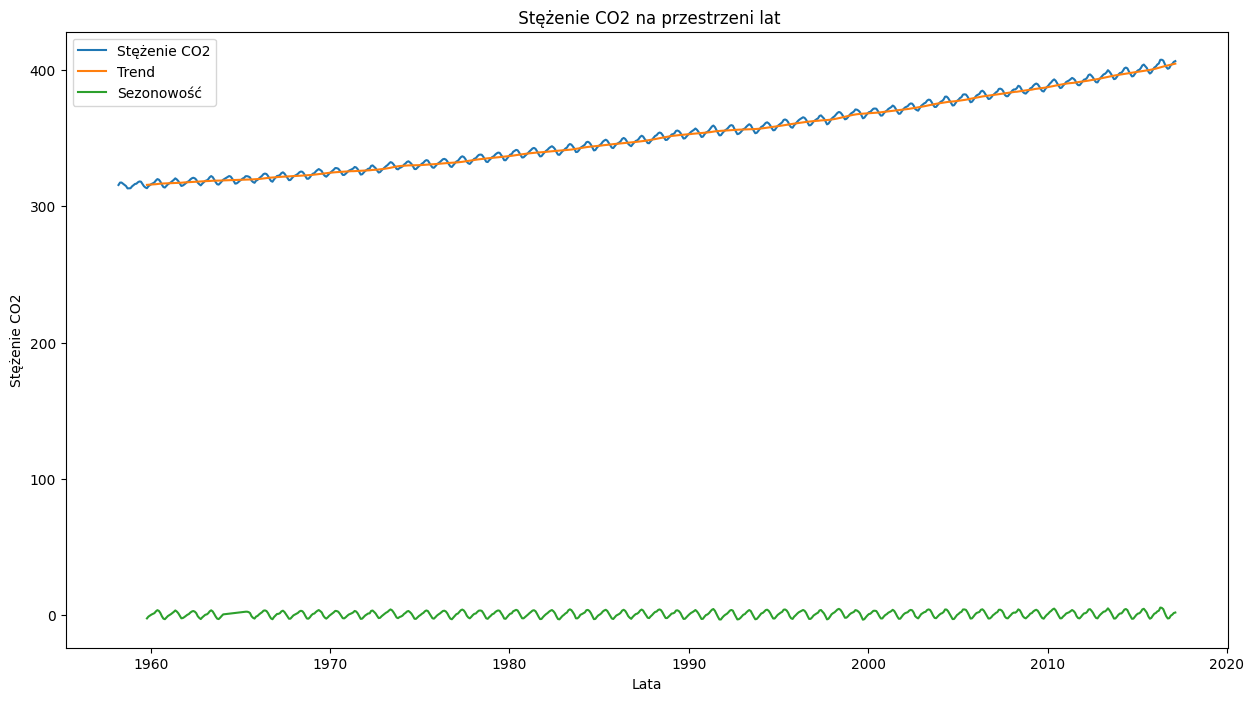

In [74]:
df["Input_detrended"] = df['Carbon Dioxide (ppm)'] - df_notrend['Carbon Dioxide (ppm)']
show(df["Input_detrended"])
fig, ax = plt.subplots(1,1, figsize=(15,8))
sns.lineplot(x=df['Decimal Date'],y=df['Carbon Dioxide (ppm)'],label='Stężenie CO2')
sns.lineplot(x=df['Decimal Date'],y=df['trend'],label='Trend')
sns.lineplot(x=df['Decimal Date'],y=df["Input_detrended"],label='Sezonowość')
ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title(" Stężenie CO2 na przestrzeni lat")


Dzięki zastosowaniu średniej kroczącej, udało się dokonać ekstracji sygnału na 2 składowe - trend oraz składową odpowiedzialną za sezonowość. Widoczne jest, że amplituda sezonowości jest stała w czasie, a za wzrost stężenia CO2 w kolejnych latach odpowiedzialny jest trend. 

6. Wylicz średnia szeregu czasowego po odfiltrowaniu trendu dla danej częstotliwości i skomentuj wynik. Oto przykład dla częstotliwości miesięcznej:

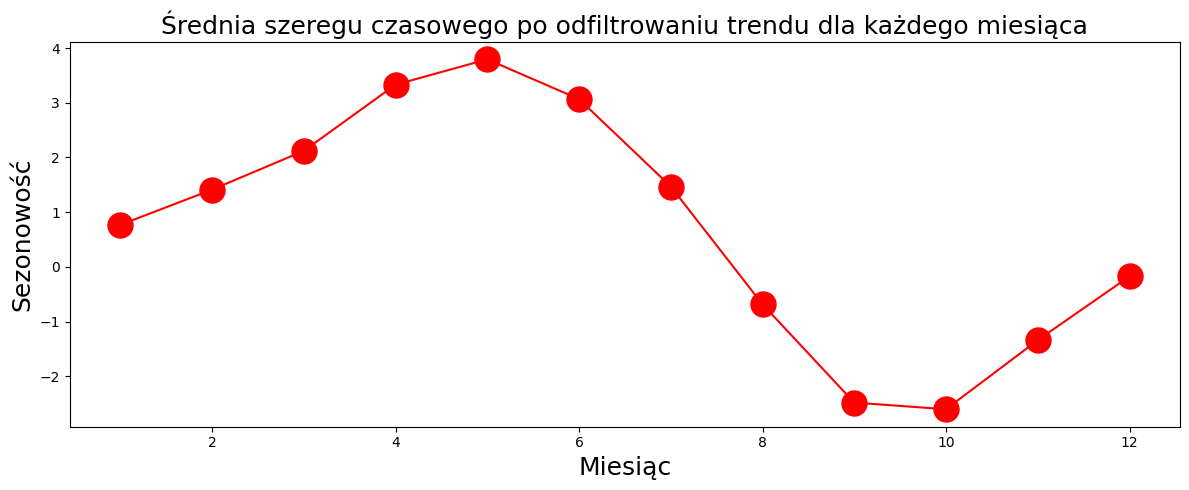

In [75]:


# Średnia dla każdego miesiąca
sezonowosc = df.groupby("Month").mean()["Input_detrended"]
sezonowosc.name = "sezonowosc"
fig, ax = plt.subplots(figsize=[12, 5])
sezonowosc.plot(y="sezonowosc", ax=ax, marker="o", color="red", markersize=18)
ax.set_xlabel("Miesiąc", fontsize=18)
ax.set_ylabel("Sezonowość", fontsize=18)
ax.set_title("Średnia szeregu czasowego po odfiltrowaniu trendu dla każdego miesiąca", fontsize=18)
plt.tight_layout()
plt.show()



7. Powtórz pattern sezonowości wyliczony w kroku 6 i oblicz rezydua. Przykład:

In [76]:
df = df.merge(right=sezonowosc, left_on="Month", right_index=True)
df = df.sort_index()
show(df)


In [77]:
df["residual"] = df['Carbon Dioxide (ppm)'] - df["trend"] - df["sezonowosc"]

show(df["residual"])

8. Wykonaj wykres dla rezyduów 

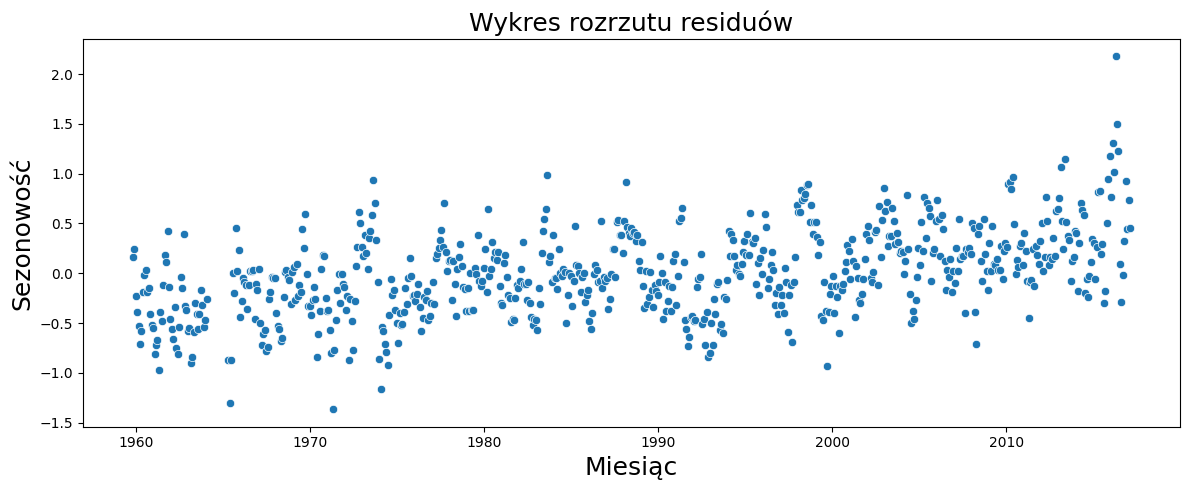

In [78]:
fig, ax = plt.subplots(figsize=[12, 5])
sns.scatterplot(x=df['Decimal Date'],y=df["residual"], ax=ax)
ax.set_xlabel("Miesiąc", fontsize=18)
ax.set_ylabel("Sezonowość", fontsize=18)
ax.set_title("Wykres rozrzutu residuów", fontsize=18)
plt.tight_layout()
plt.show()

9. Wykonaj zbiorczy wykres i krótki zinterpretuj wyniki. Przykład:

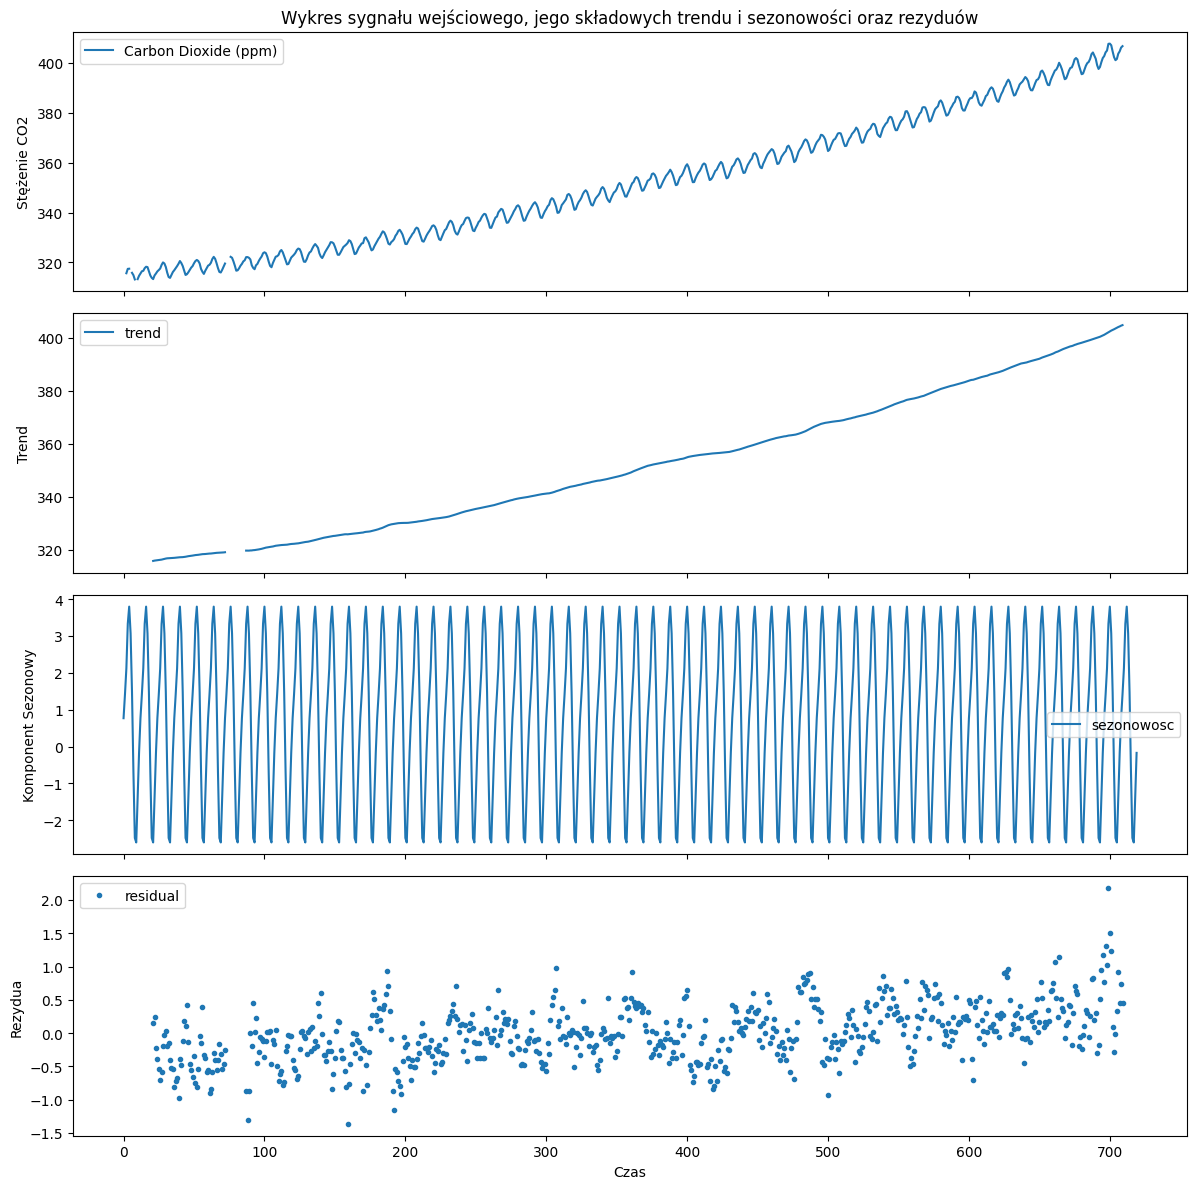

In [79]:
fig, ax = plt.subplots(nrows=4, figsize=[12, 12], sharex=True)

df['Carbon Dioxide (ppm)'].plot(ax=ax[0], legend="Input")
ax[0].set_xlabel("Lata")
ax[0].set_ylabel("Stężenie CO2")

df["trend"].plot(ax=ax[1], legend="trend")
ax[1].set_ylabel("Trend")

df["sezonowosc"].plot(ax=ax[2], legend="sezonowsc")
ax[2].set_ylabel("Komponent Sezonowy")

df["residual"].plot(ax=ax[3], marker=".", legend="residual", ls="None")
ax[3].set_ylabel("Rezydua")

ax[0].set_title("Wykres sygnału wejściowego, jego składowych trendu i sezonowości oraz rezyduów")
ax[3].set_xlabel("Czas")

plt.tight_layout()

Ogólny wniosek jest taki, jak w punkcie 5.
Korzystając z trendu oraz średniej szeregu czasowego dla zadanej częstotliwości, jesteśmy w stanie otrzymać bardzo zbliżone wyniki do sygnału wejściowego.